# Exploration des données

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Chargement des données
df_mort= pd.read_table('mortality.txt',delimiter=';',names=['Cancer_code', 'Sex', 'Age_bucket', 'Location', 'Year', 'Nb_deaths'],low_memory=False)

In [3]:
#Visualisation des 5 premières lignes
df_mort.head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths
0,C80,2,1,Jamaica,2000,2
1,C80,2,2,Jamaica,2000,0
2,C80,2,3,Jamaica,2000,1
3,C80,2,4,Jamaica,2000,0
4,C80,2,5,Jamaica,2000,0


In [6]:
#Nombre de lignes et de colonnes
df_mort.shape

(6359642, 6)

In [4]:
#Description du data set
df_mort.describe(include='all')

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths
count,6359642,6.359642e+06,6.359642e+06,6359642,6.359642e+06,6.359642e+06
unique,94,NaN,NaN,153,NaN,NaN
top,C16,NaN,NaN,Japan,NaN,NaN
freq,197201,NaN,NaN,103645,NaN,NaN
mean,NaN,1.540061e+00,1.000000e+01,NaN,1.992326e+03,3.230369e+01
std,NaN,6.528709e-01,5.477226e+00,NaN,1.609652e+01,2.649799e+02
min,NaN,1.000000e+00,1.000000e+00,NaN,1.950000e+03,0.000000e+00
25%,NaN,1.000000e+00,5.000000e+00,NaN,1.981000e+03,0.000000e+00
50%,NaN,2.000000e+00,1.000000e+01,NaN,1.996000e+03,0.000000e+00
75%,NaN,2.000000e+00,1.500000e+01,NaN,2.006000e+03,5.000000e+00


In [6]:
#training['ethnic group'].value_counts().plot.pie()
#pd.isna(training['ethnic group'])
#training.loc[,['ethnic group']]


In [7]:
#training['ethnic group'].value_counts()

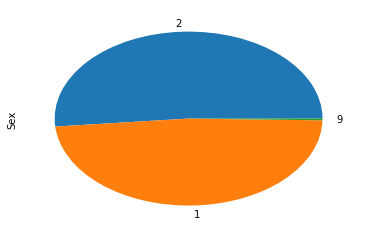

In [5]:
df_mort['Sex'].value_counts().plot.pie()

Il y a donc autant de femmes que d'hommes dans le data set

Text(0.5,1,'Number of deads by cancer')

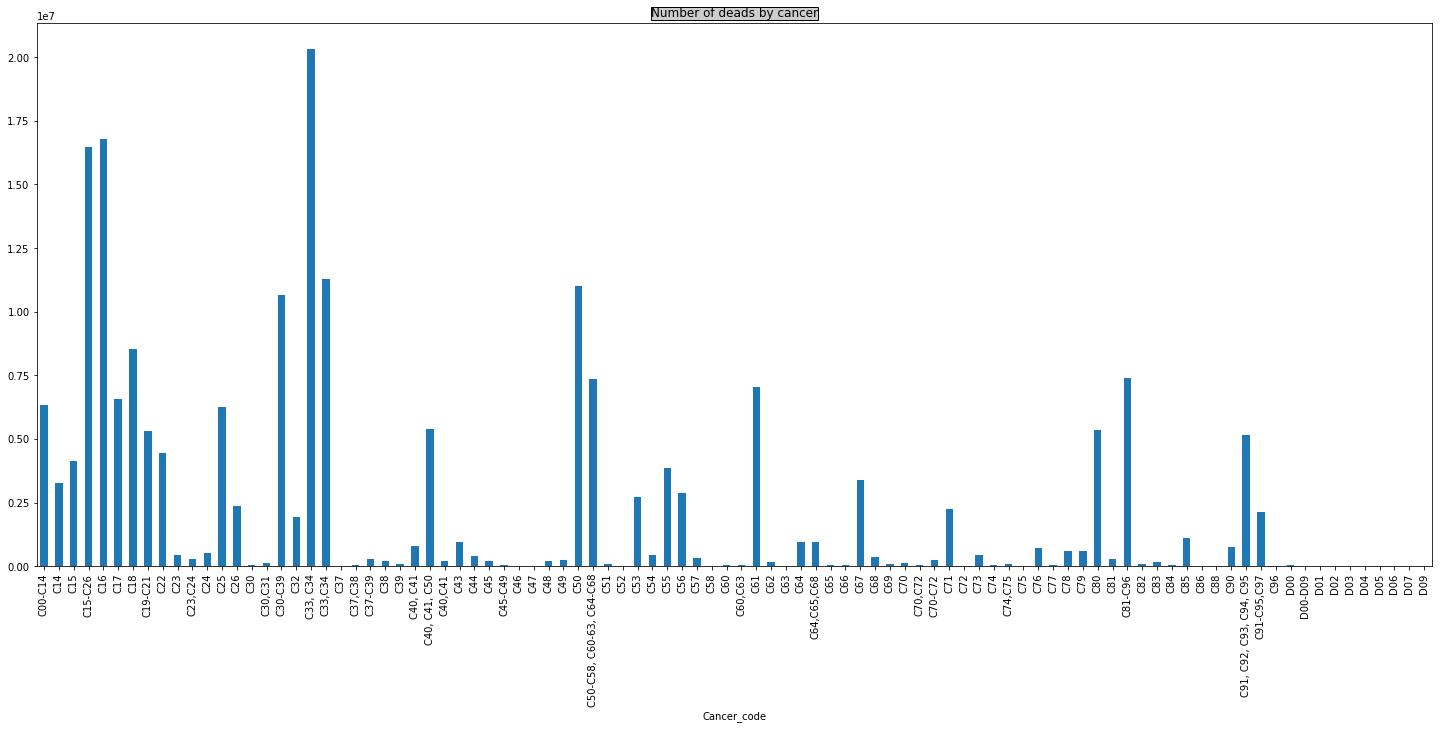

In [9]:
mort_by_cancer = df_mort.groupby(['Cancer_code'])['Nb_deaths'].sum()
mort_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deads by cancer', bbox={'facecolor':'0.8', 'pad':0})

Nous remarquons que le cancer C33,C34: 	Malignant neoplasm of trachea, bronchus and lung est le plus present.

In [11]:
df_2000=df_mort[df_mort['Year']>=2000]

Text(0.5,1,'Number of deads from 2000 to 2015')

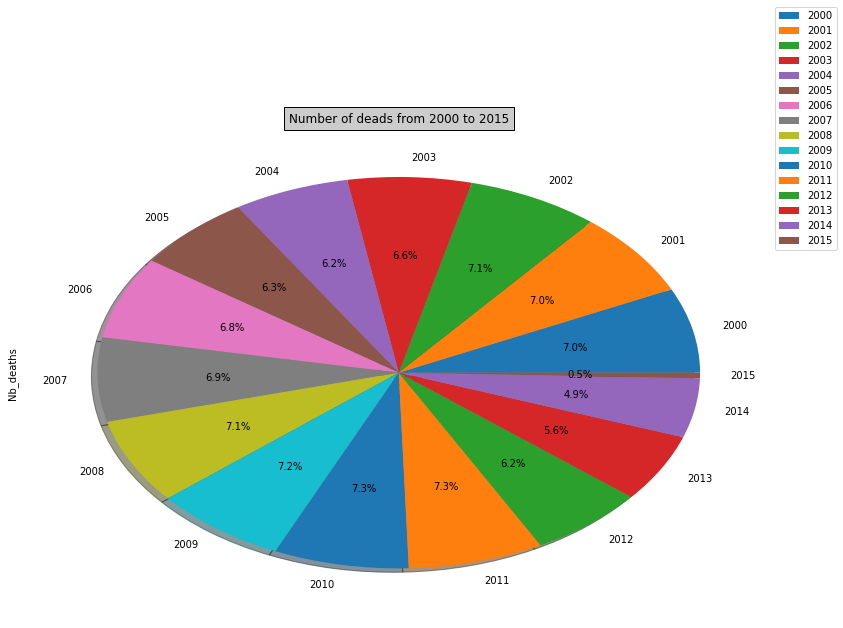

In [53]:
#le nombre de morts de 2000 à 2015
mort_by_year=df_2000.groupby(['Year'])['Nb_deaths'].sum()
explode = (0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0)
mort_by_year.transpose().plot(kind='pie',figsize=(13.5, 9),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of deads from 2000 to 2015', bbox={'facecolor':'0.8', 'pad':5})
#.count()

Text(0.5,1,'Number of sicks by cancer')

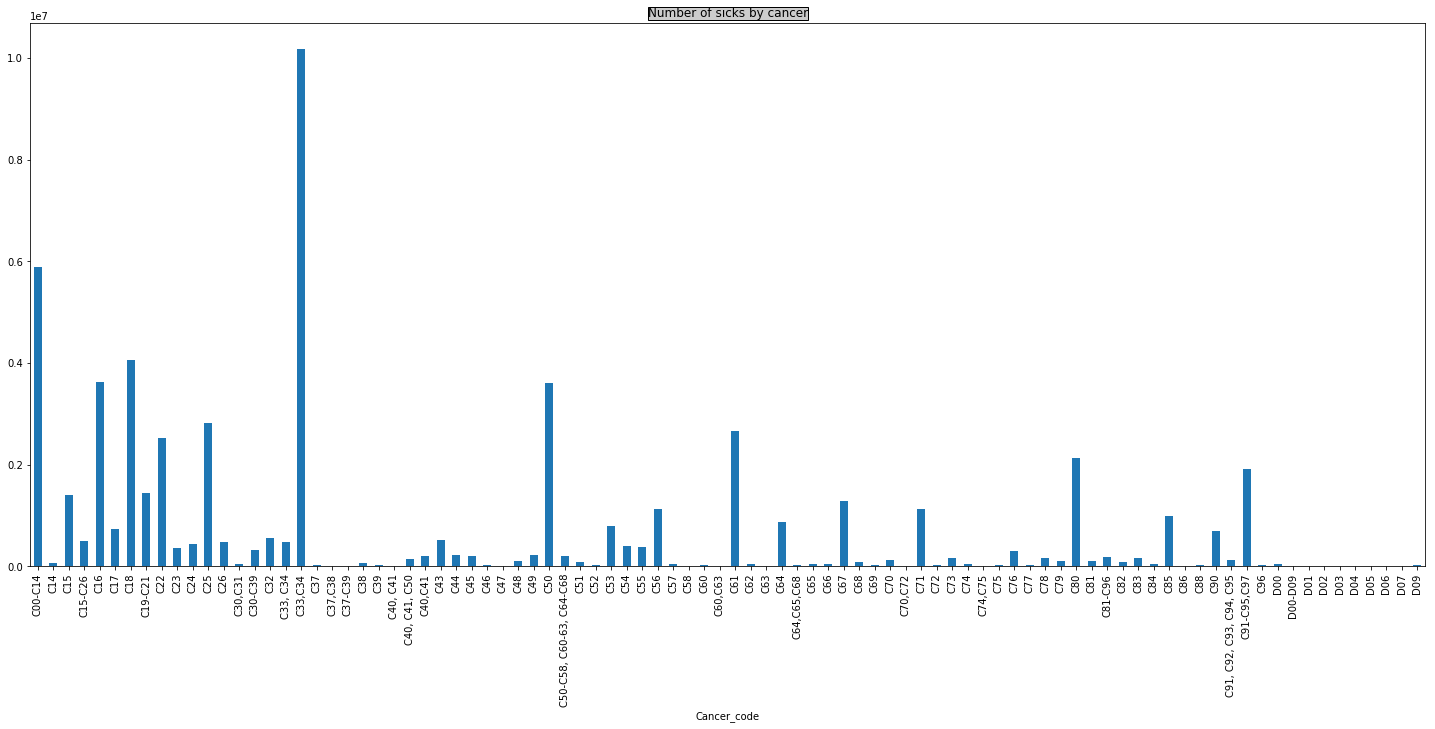

In [54]:
#On voudrait savoir quels sont les cancers qui font le plus de morts
df_2000_by_cancer = df_2000.groupby(['Cancer_code'])['Nb_deaths'].sum()
df_2000_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of sicks by cancer', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5,1,'Number of deads by cancer')

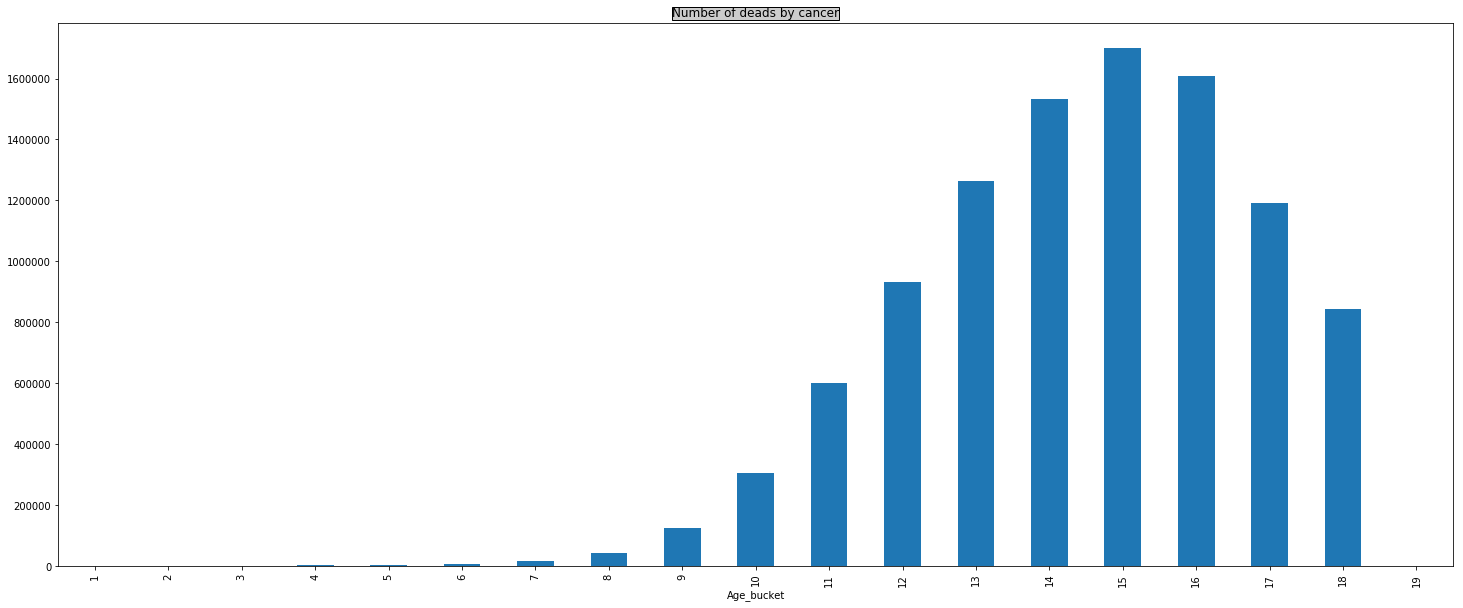

In [12]:
#Nombre de morts du cancer C33,C34 par tranche d'age
mort_by_cancer = df_2000[df_2000['Cancer_code']=="C33,C34"].groupby(['Age_bucket'])['Nb_deaths'].sum()
mort_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deads by age bucket', bbox={'facecolor':'0.8', 'pad':0})

La tranche d'age la plus touchée par le cancer C33,C34 est 14 c'est à dire entre 65ans et 69ans.

Text(0.5,1,'Number of deads by cancer')

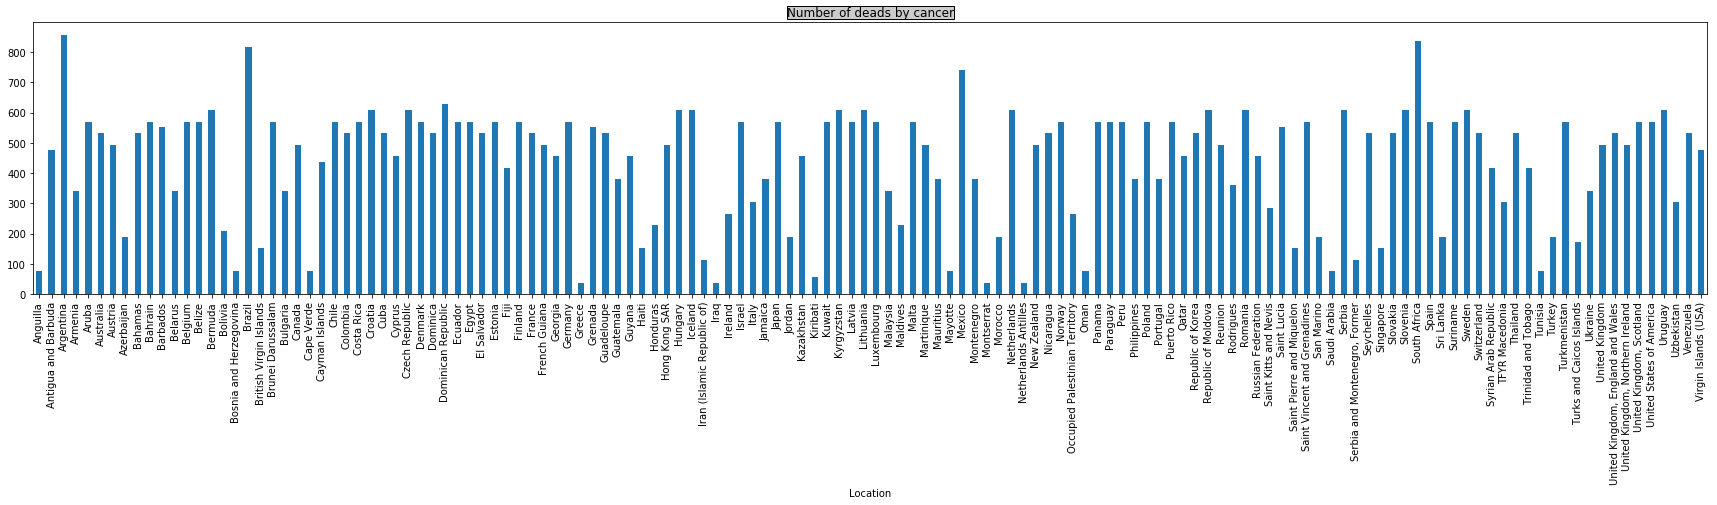

In [55]:
df_2000_by_country = df_2000[df_2000['Cancer_code']=="C33,C34"] .groupby(['Location'])['Nb_deaths'].count()
df_2000_by_country.transpose().plot(kind='bar',figsize=(30, 5))
plt.title('Number of deads by cancer', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5,1,'Number of sicks by cancer in Brazil')

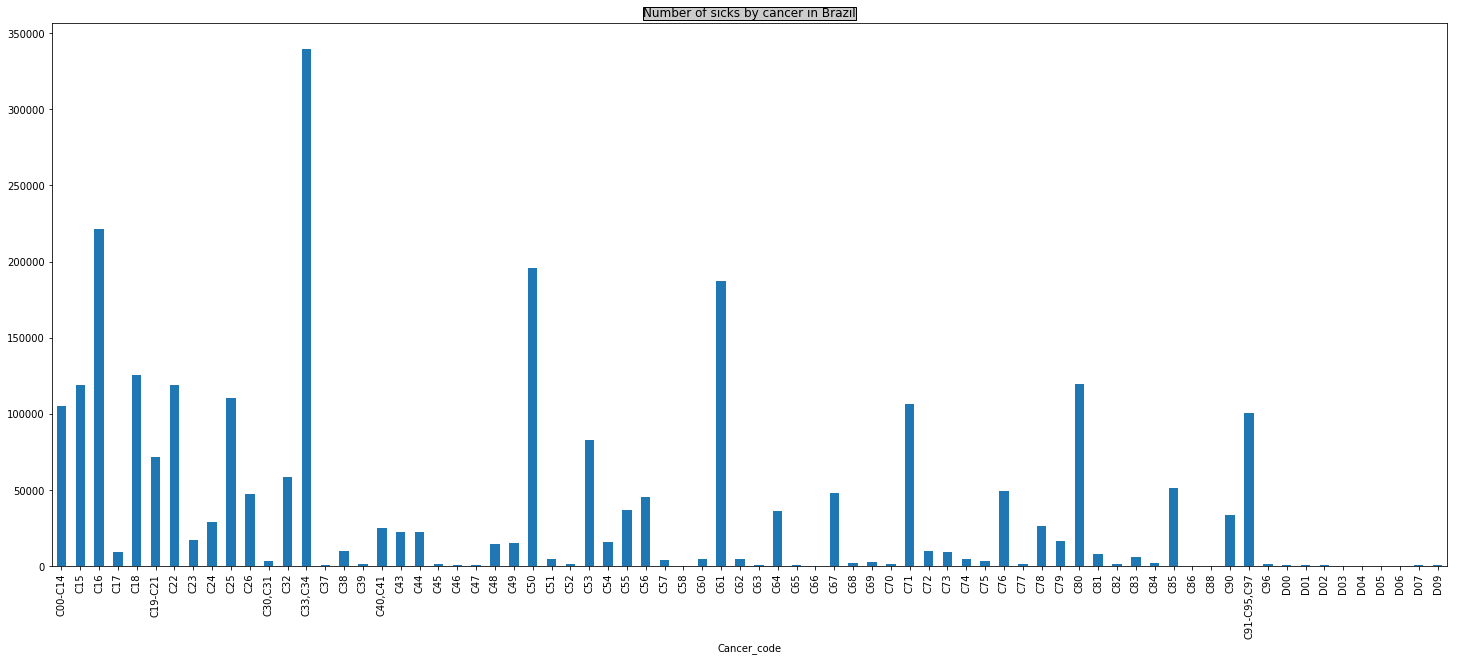

In [56]:
#Prenons l'exemple du Brazil, quels sont les cancers detectés ? 
df_Brazil_2000 = df_2000[df_2000['Location'] == 'Brazil']
#incidence_USA_2002 = pd.DataFrame({'cancer_code':Taux_incidence_by_cancer.index, 'count':Taux_incidence_by_cancer.values})
df_Brazil_2000_by_cancer=df_Brazil_2000.groupby(['Cancer_code'])['Nb_deaths'].sum()
df_Brazil_2000_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deaths by cancer in Brazil', bbox={'facecolor':'0.8', 'pad':0})

C:\Users\DIARRA née CISSE Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Number of sicks by cancer in USA')

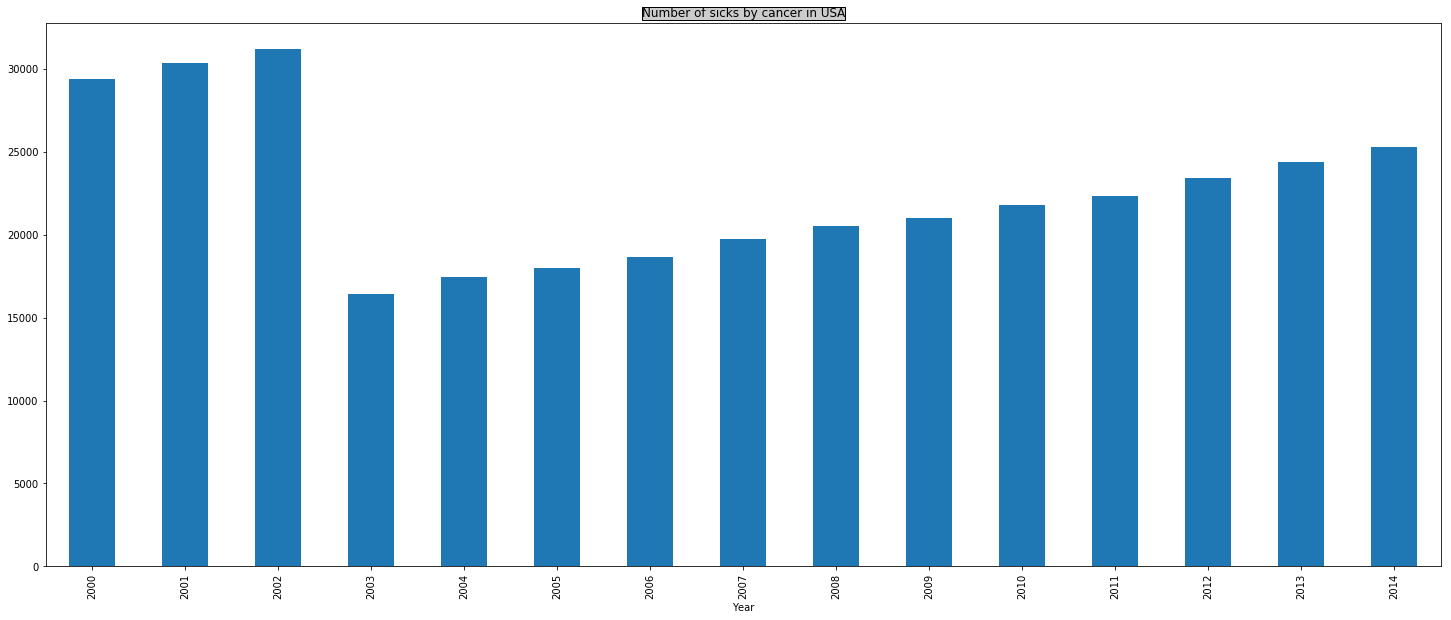

In [57]:
df_Brazil_2000 = df_2000[df_2000['Location'] == 'Brazil']
#incidence_USA_2002 = pd.DataFrame({'cancer_code':Taux_incidence_by_cancer.index, 'count':Taux_incidence_by_cancer.values})
df_Brazil_2000_by_cancer=df_Brazil_2000[df_2000['Cancer_code'] == 'C33,C34'].groupby(['Year'])['Nb_deaths'].sum()
df_Brazil_2000_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deaths caused by Malignant neoplasm of trachea, bronchus and lun in Brazil', bbox={'facecolor':'0.8', 'pad':0})